rough   draft

In [124]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import warnings 
# warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [125]:
df = pd.read_csv("./data/CarInsurance.csv").copy()
pd.set_option('display.max_columns', None) 
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [127]:
display(df.shape)

(58592, 44)

In [128]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


#### Model-based Exploratory Data Analysis, using models as tools to understand the data
#### Using models to predict what us seen in the data
Using a model to gain insights about the data (analysis) objective 1 and 2
 - understanding what is happeing

Using a model to generalize and predict new data (modeling) - objective 3 and 4
 - can we predict what is happening from the insits we got

analysis stops at insight, modeling begins at prediction



# understanidng the data
there is car features and there is policy holder related features

obj1:To identify which car features are most associated with the risk of a claim

obj2: To determine which policyholder-related features are the likelyhood of a claim

-considerations safety/ tech features- 

obj3: - To build classification models that predict the likelihood of a policyholder filing a claim

obj4- To improve the performance of the model by at least 10% by perform hyperparameter tuning on the best model. 
obj4- To improve the AUC-ROC score from 0.72 to at least 0.80 through hyperparameter tuning of the best-performing model

# column descriptions
The dataset can be found at [this link](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=train.csv)

### column description

 <!-- <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F8de49a1611548cbb48f5b94f27416f46%2F1.png?generation=1668437786757096&alt=media" width = "1000"/> <br> 
 <img src = "https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F9583913%2F4156d37a2440fbfb6d4e0be279b9fcb9%2F2.png?generation=1668438349301554&alt=media" width = "1000"/> -->

# selecting the features

In [129]:


display(df.columns)

Index(['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder',
       'area_cluster', 'population_density', 'make', 'segment', 'model',
       'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags',
       'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

##### Reduce irrelevant features early to help focus our efforts on more meaningful features
- drop obvious features not useful for analysis and prediction

In [130]:

pd.set_option('display.max_columns', None)   # get an overview of the data in each column display all columns
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


### *Display the unique categories and their count for each column (cardinality)*
This helps in to identifying features with high number of unique categories which are not useful for prediction and those that require preprocessing e.g., inconsistent strings,mixed datatypes, encoding, scaling, etc

In [131]:

for col in df.columns:
    #if df[col].dtype == 'object':
        print(f"column: {col}, Total unique categories: {df[col].nunique()}, data type: {df[col].dtype}")
        print(df[col].value_counts())
        print("\n")

column: policy_id, Total unique categories: 58592, data type: object
ID02107    1
ID54625    1
ID49436    1
ID22829    1
ID09089    1
          ..
ID31296    1
ID48992    1
ID13322    1
ID39091    1
ID50397    1
Name: policy_id, Length: 58592, dtype: int64


column: policy_tenure, Total unique categories: 58592, data type: float64
1.167538    1
0.083828    1
0.073493    1
0.135073    1
0.123339    1
           ..
0.666820    1
0.347605    1
0.441174    1
0.986366    1
1.215153    1
Name: policy_tenure, Length: 58592, dtype: int64


column: age_of_car, Total unique categories: 49, data type: float64
0.01    6362
0.00    5257
0.02    5189
0.03    4415
0.04    3763
0.05    3342
0.10    3123
0.06    3053
0.07    2888
0.08    2730
0.09    2643
0.12    2506
0.11    2442
0.13    2315
0.14    2151
0.15    1964
0.16    1291
0.17     931
0.18     738
0.19     458
0.20     287
0.21     172
0.22     148
0.23      90
0.24      65
0.25      46
0.30      32
0.27      29
0.31      26
0.28      25
0.26

In [132]:
# check if the dataset is imbalanced in percentage
df['is_claim'].value_counts()*100

0    5484400
1     374800
Name: is_claim, dtype: int64

In [133]:
#Baseline model to see how well it predicts with the raw data unaltered
# Split the data into X and y
y = df['is_claim']
X = df.drop(columns=['is_claim'])

In [134]:
# perform a train-test split
# the dataset is imbalanced so need to use stratify 
# take care of imbalanced dataset
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y , test_size=0.2, random_state=42)

In [135]:
# check the distribution to confirm that the split is stratified 
print("Train distribution:\n", y_train.value_counts(normalize=True))
print("Test distribution:\n", y_test.value_counts(normalize=True))

Train distribution:
 0    0.93604
1    0.06396
Name: is_claim, dtype: float64
Test distribution:
 0    0.936001
1    0.063999
Name: is_claim, dtype: float64


# Data cleaning

In [136]:
# check for missing values
missing_values = X_train.isnull().sum()
missing_values

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [137]:
# check for duplicates
duplicates = X_train.duplicated().sum()
duplicates

0

## Check to confirm that the data is in the correct string format

In [138]:
# check for correct string formatting
object_columns = X_train.select_dtypes(include='object').columns

for col in object_columns:
    print(f"Column: {col},  unique value count: {X_train[col].nunique()} \n")
    print(f"Unique values: {X_train[col].unique()}\n\n")



Column: policy_id,  unique value count: 46873 

Unique values: ['ID47136' 'ID58129' 'ID35001' ... 'ID10484' 'ID34810' 'ID25791']


Column: area_cluster,  unique value count: 22 

Unique values: ['C5' 'C13' 'C8' 'C12' 'C3' 'C14' 'C6' 'C4' 'C1' 'C2' 'C9' 'C19' 'C10'
 'C15' 'C7' 'C16' 'C22' 'C11' 'C17' 'C21' 'C18' 'C20']


Column: segment,  unique value count: 6 

Unique values: ['C1' 'B1' 'B2' 'A' 'C2' 'Utility']


Column: model,  unique value count: 11 

Unique values: ['M2' 'M8' 'M6' 'M1' 'M4' 'M5' 'M7' 'M10' 'M3' 'M9' 'M11']


Column: fuel_type,  unique value count: 3 

Unique values: ['Petrol' 'CNG' 'Diesel']


Column: max_torque,  unique value count: 9 

Unique values: ['113Nm@4400rpm' '82.1Nm@3400rpm' '60Nm@3500rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '85Nm@3000rpm' '91Nm@4250rpm' '200Nm@1750rpm'
 '170Nm@4000rpm']


Column: max_power,  unique value count: 9 

Unique values: ['88.50bhp@6000rpm' '55.92bhp@5300rpm' '40.36bhp@6000rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '61.68bhp@6000

# display summary statistics to check for outliers or placeholder values 

In [139]:
X_train.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
count,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000,46873.000000
mean,0.612408,0.069343,0.469697,18829.491946,1.766774,3.137862,1163.143345,3.628272,5.245536,4.853295,3851.108143,1672.481983,1553.453203,1385.409788,1.763787
std,0.414739,0.056389,0.122799,17660.971421,1.139808,1.833305,266.068922,0.483271,0.430409,0.227930,311.079047,111.985636,79.672626,212.480747,1.390179
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.000000,1051.000000,0.000000
25%,0.209692,0.020000,0.375000,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.000000,1185.000000,0.000000
50%,0.575494,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.000000,1335.000000,2.000000
75%,1.040034,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.000000,1510.000000,3.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.000000,1720.000000,5.000000


# Preprocessing 


## Check for highly correlated features

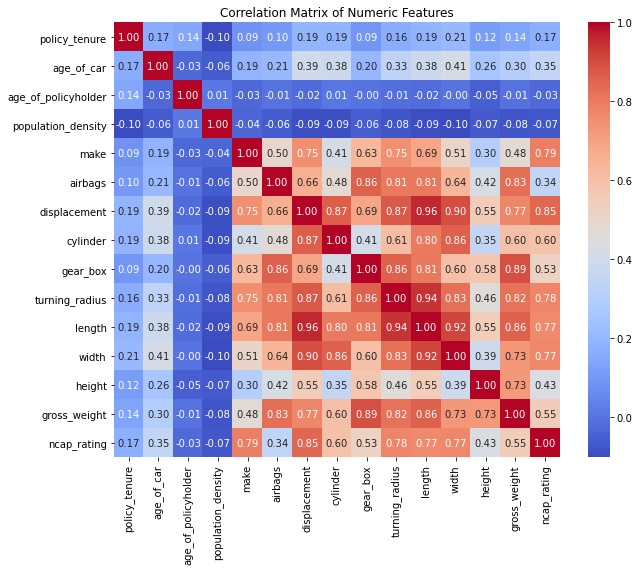

Highly correlated pairs (>|0.8|):
 [('cylinder', 'displacement', 0.8656809812441848), ('gear_box', 'airbags', 0.858728076358932), ('turning_radius', 'airbags', 0.8100502875681712), ('turning_radius', 'displacement', 0.8744454553111701), ('turning_radius', 'gear_box', 0.8613468668832488), ('length', 'airbags', 0.8088258759205875), ('length', 'displacement', 0.9613145560745), ('length', 'cylinder', 0.8044549456588295), ('length', 'gear_box', 0.8087848674185618), ('length', 'turning_radius', 0.9446800200614004), ('width', 'displacement', 0.8982989598482476), ('width', 'cylinder', 0.8611322639589516), ('width', 'turning_radius', 0.8250896247382318), ('width', 'length', 0.9153998529084707), ('gross_weight', 'airbags', 0.8280573313764016), ('gross_weight', 'gear_box', 0.8942018619547695), ('gross_weight', 'turning_radius', 0.8214075574607564), ('gross_weight', 'length', 0.8603958865772183), ('ncap_rating', 'displacement', 0.8461886938748989)]


In [144]:
# Correlation matrix for numeric features
numeric_cols = X_train.select_dtypes(include='number').columns
corr_matrix = X_train[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Optionally, print pairs with high correlation
high_corr = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print("Highly correlated pairs (>|0.8|):\n", high_corr)

In [147]:
high_corr = []
threshold = 0.8
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
print("Highly correlated pairs (>|0.8|):\n")
for pair in high_corr:
    print(f"{pair[0]} & {pair[1]}: correlation = {pair[2]:.2f}")

Highly correlated pairs (>|0.8|):

cylinder & displacement: correlation = 0.87
gear_box & airbags: correlation = 0.86
turning_radius & airbags: correlation = 0.81
turning_radius & displacement: correlation = 0.87
turning_radius & gear_box: correlation = 0.86
length & airbags: correlation = 0.81
length & displacement: correlation = 0.96
length & cylinder: correlation = 0.80
length & gear_box: correlation = 0.81
length & turning_radius: correlation = 0.94
width & displacement: correlation = 0.90
width & cylinder: correlation = 0.86
width & turning_radius: correlation = 0.83
width & length: correlation = 0.92
gross_weight & airbags: correlation = 0.83
gross_weight & gear_box: correlation = 0.89
gross_weight & turning_radius: correlation = 0.82
gross_weight & length: correlation = 0.86
ncap_rating & displacement: correlation = 0.85


*Insight* - From the correlation matrix we can see that there are several highly correlated features e.g., displacement and length have 0.96 , gear_box and gross_weight have 0.89. 

Highly correlated features can be redundant to cause unnecessary complexity thus overfitting
It is best to dropping one of each highly correlated pair is recommended to simplify the models we are to build

# Build a baseline model 
The logistic Regression model is used as a baseline to guide my preprocessing decisions
This is so as to give a reference point for the model performance which helps measure how much the preprocessing and feature engineering that takes place improves the model performance

In [140]:
X_train = X_train.drop(columns=['policy_id'])

In [142]:
# # build a baseline model(Logistic Regression)
# baseline_model = LogisticRegression(random_state=42)
# baseline_model.fit(X_train, y_train)


# # make probability predictions
# y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]  # Get the probabilities for class 1

# # calculate the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print(f"The ROC AUC score of baseline model is: {roc_auc:.8f}")


In [ ]:
# # drop the useless columns
# df.drop(columns=["policy_id"], inplace= True)

# # confirm the column has been dropped 
# df.head(1)

In [ ]:
# car age and policy hoder age have been normalized

In [ ]:
# select relevant features based on domain knowledge 

- drop useless columns
- check for correlation between categorical features
- out of those that remain, using domain knowledge select the most relevant features that have a strong correlation with the target variable

SyntaxError: invalid syntax (<ipython-input-66-2d12261e7f3e>, line 3)